In [3]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
frames = []
usernames = ["JustinTrudeau","ElizabethMay","AndrewScheer","MaximeBernier","theJagmeetSingh"]
for username in usernames:
    file_path = "../data/{}_data.csv".format(username)
    timeline_df = pd.read_csv(file_path)
    frames.append(timeline_df)
total_df = pd.concat(frames,sort=False).sample(frac=1) 
total_df.head(3)  

id   type                      created_at  \
972  1125186089017155584  tweet  Sun May 05 23:50:43 +0000 2019   
186  1175458194380021763  tweet  Sat Sep 21 17:14:07 +0000 2019   
615  1095681538363215873  tweet  Wed Feb 13 13:50:10 +0000 2019   

                                                source  \
972  <a href="https://studio.twitter.com" rel="nofo...   
186  <a href="https://studio.twitter.com" rel="nofo...   
615  <a href="http://twitter.com/download/iphone" r...   

                                         original_text  \
972  As you fill up your car this weekend for the b...   
186  World Marrow Donor Day celebrates the millions...   
615  Thank you Gerry Rogers for your service to the...   

                                            clean_text  favorite_count  \
972  fill car weekend busy week ahead forget high g...            2039   
186  world marrow donor day celebrates million volu...             554   
615  thank gerry rogers service people john centre ...             110   

     retweet_count hashtags mentions  original_author  lda_cluster to_date  
972            896      NaN      NaN     AndrewScheer            0     NaN  
186            190      NaN      NaN     AndrewScheer            6     NaN  
615             15      NaN      NaN  theJagmeetSingh            3     NaN

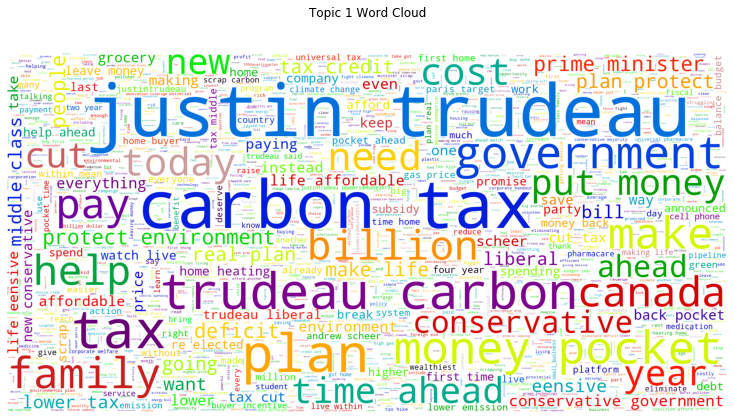

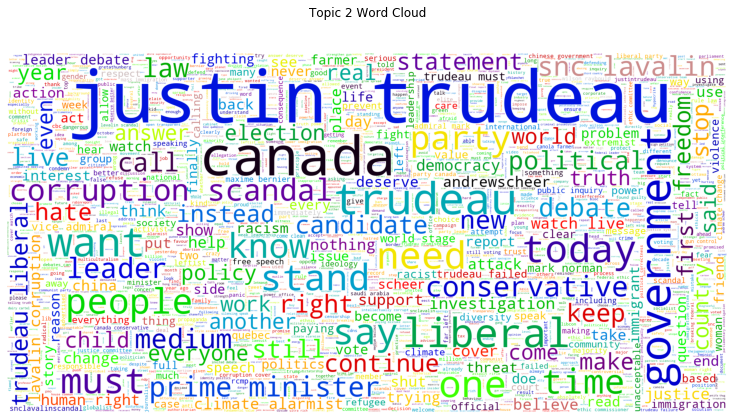

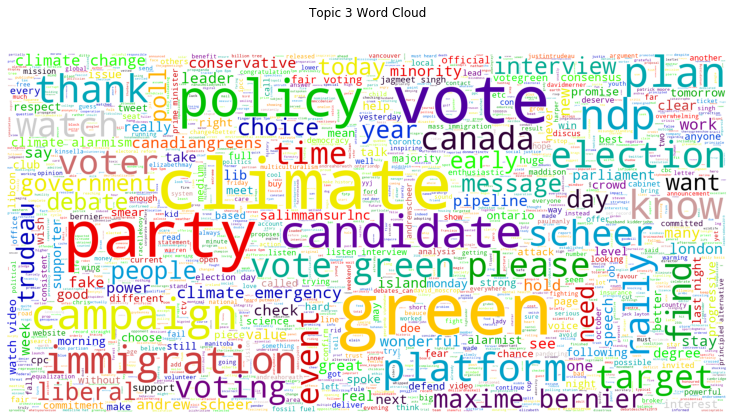

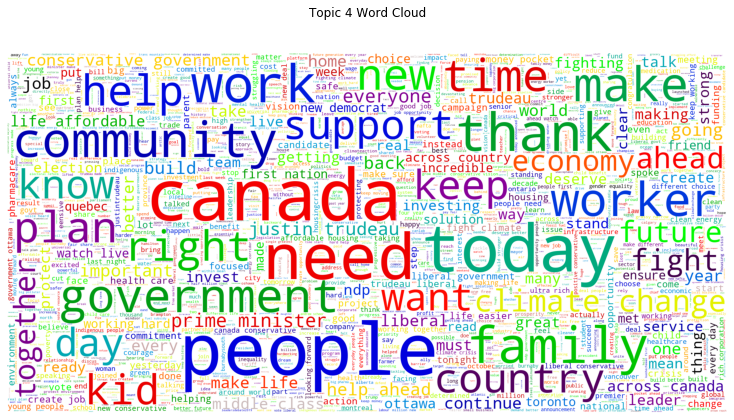

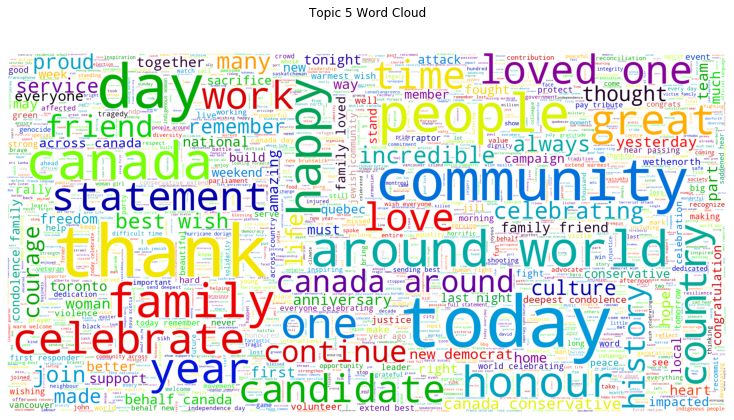

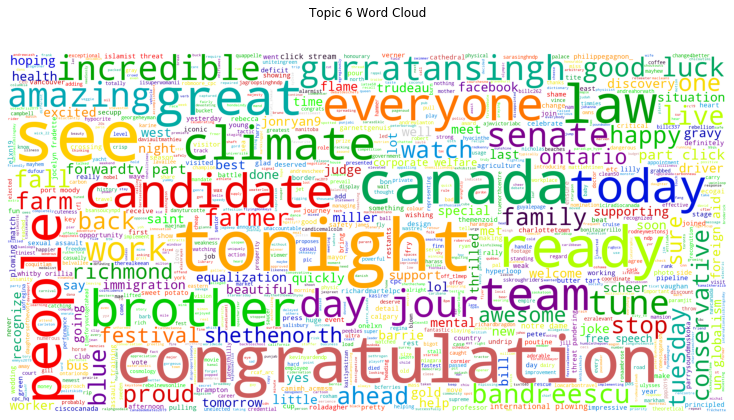

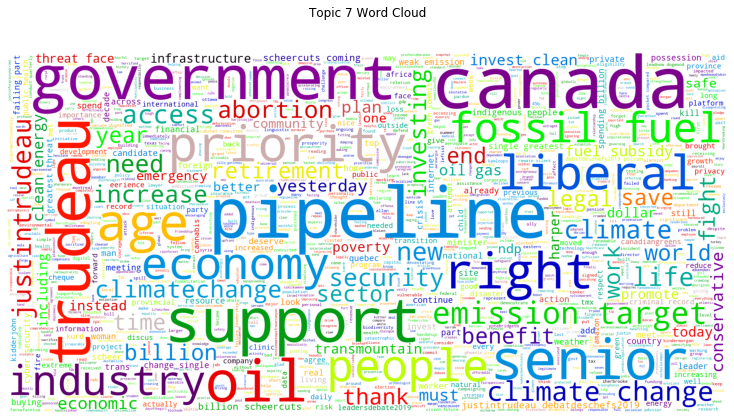

In [21]:
for topic in range(len(total_df["lda_cluster"].unique())-1):
    text = total_df[total_df["lda_cluster"]==topic]['clean_text']
    word_cloud = WordCloud(width=2000, height=1000, max_font_size=200, background_color="white", max_words=2000,
                        colormap="nipy_spectral", stopwords=STOPWORDS).generate(' '.join(text))
    plt.figure(figsize=(10, 10))
    plt.imshow(word_cloud, interpolation="hermite")
    plt.title("Topic {} Word Cloud\n\n".format(topic+1))
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig("../visualizations/wordclouds/topic_{}_wordcloud.png".format(topic+1))